In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import scipy.io
import pandas as pd
from skimage import color
from skimage import io
from skimage.transform import radon, iradon, iradon_sart, rescale
from skimage.metrics import structural_similarity
from skimage.metrics import peak_signal_noise_ratio
import math
import matplotlib.pyplot as plt

Mounted at /content/drive


In [ ]:
ctScans = scipy.io.loadmat('/content/drive/My Drive/CCE-AIMIA/ctscan_hw1.mat')
ctMasks = scipy.io.loadmat('/content/drive/My Drive/CCE-AIMIA/infmsk_hw1.mat')

In [ ]:
(ms,ns,cs)= (ctScans['ctscan']).shape
(mm,nm,cm)= (ctMasks['infmsk']).shape
print((ms,ns,cs))
print((mm,nm,cm))

(512, 512, 3554)
(512, 512, 3554)


In [ ]:
ctscansarray = []
ctmasksarray = []
for i in range(cm):
    ctscansarray.append((ctScans['ctscan'][:,:,i]))
    ctmasksarray.append((ctMasks['infmsk'][:,:,i]))

In [ ]:
image = ctscansarray[3514]
image.shape

(512, 512)

In [ ]:
class KmeansSegmentation:

    def segmentation_grey(self, image, k=2):
        """Performs segmentation of an grey level input image using KMeans algorithm, using the intensity of the pixels as features
        The function is the modified version adopted from the one produced by the below given github User
        https://github.com/DSGeek24/Image-segmentation_KMeans/
        """
        #assigning cluster centroids clusters
        centroids = []
        clusters=[]

        i=1
        # Initializes k number of centroids for the clustering making sure no cluster centroids are same

        while(len(centroids)!=k):
            cent = image[np.random.randint(0, image.shape[0]), np.random.randint(0, image.shape[1])]
            if(len(centroids)>=1):
                if(cent not in centroids):
                    centroids.append(cent)
            else:
                centroids.append(cent)
        print("Initial centroids are {}".format(centroids))

        # Initializing k clusters
        for m in range(0, k):
            cluster=[]
            clusters.append(cluster)

        # Calling k means which returns the clusters with pixels
        clusters = self.kmeans(clusters, image, centroids, k)
        new_centroids=self.calculate_new_centroids(clusters,k)

        # clustering and finding new centroids till convergence is reached
        while(not(np.array_equal(new_centroids,centroids))) and i<=15:
            centroids=new_centroids
            clusters=self.kmeans(clusters,image,centroids,k)
            new_centroids = self.calculate_new_centroids(clusters, k)
            i=i+1
        print("Convergence reached")

        image=self.assignPixels(clusters,image,k)
        return image

    def findMinIndex(self,pixel, centroids):
        d = []
        for i in range(0, len(centroids)):
            d1 = abs(int(pixel) - centroids[i])
            d.append(d1)
        minIndex = d.index(min(d))
        return minIndex

    def assignPixels(self,clusters,image,k):
        cluster_centroids=[]
        for i in range(0, k):
            cent = np.nanmean(clusters[i])
            cluster_centroids.append(cent)

        for x in range(image.shape[0]):
            for y in range(image.shape[1]):
                Value = round(cluster_centroids[self.findMinIndex(image[x,y], cluster_centroids)])
                image[x, y] = Value
        return image

    def kmeans(self, clusters, image, centroids, k):

        def add_cluster(minIndex, pixel):
            try:
                clusters[minIndex].append(pixel)
            except KeyError:
                clusters[minIndex] = [pixel]
        for x in range(0, image.shape[0]):
            for y in range(0, image.shape[1]):
                pixel = image[x, y].tolist()
                minIndex = self.findMinIndex(pixel, centroids)
                add_cluster(minIndex, pixel)
        return clusters

    def calculate_new_centroids(self,clusters,k):
        new_centroids=[]
        for i in range(0, k):
            cent = np.nanmean(clusters[i])
            new_centroids.append(round(cent))
        return new_centroids

In [ ]:
Segementation_object = KmeansSegmentation()
KmeanSegData = []
for i in range(len(ctscansarray)):
  KmeanSegData.append(Segementation_object.segmentation_grey(ctscansarray[i], 3))

Initial centroids are [224, 113, 243]
Convergence reached
Initial centroids are [255, 211, 227]
Convergence reached
Initial centroids are [253, 145, 29]
Convergence reached
Initial centroids are [255, 120, 64]
Convergence reached
Initial centroids are [255, 67, 108]
Convergence reached
Initial centroids are [230, 46, 84]
Convergence reached
Initial centroids are [226, 22, 63]
Convergence reached
Initial centroids are [253, 36, 48]
Convergence reached
Initial centroids are [255, 63, 54]
Convergence reached
Initial centroids are [255, 89, 86]
Convergence reached
Initial centroids are [245, 47, 85]
Convergence reached
Initial centroids are [235, 17, 91]
Convergence reached
Initial centroids are [255, 49, 101]
Convergence reached
Initial centroids are [236, 38, 55]
Convergence reached
Initial centroids are [241, 60, 64]
Convergence reached
Initial centroids are [230, 45, 34]
Convergence reached
Initial centroids are [232, 27, 12]
Convergence reached
Initial centroids are [246, 27, 36]
Conv

KeyboardInterrupt: ignored

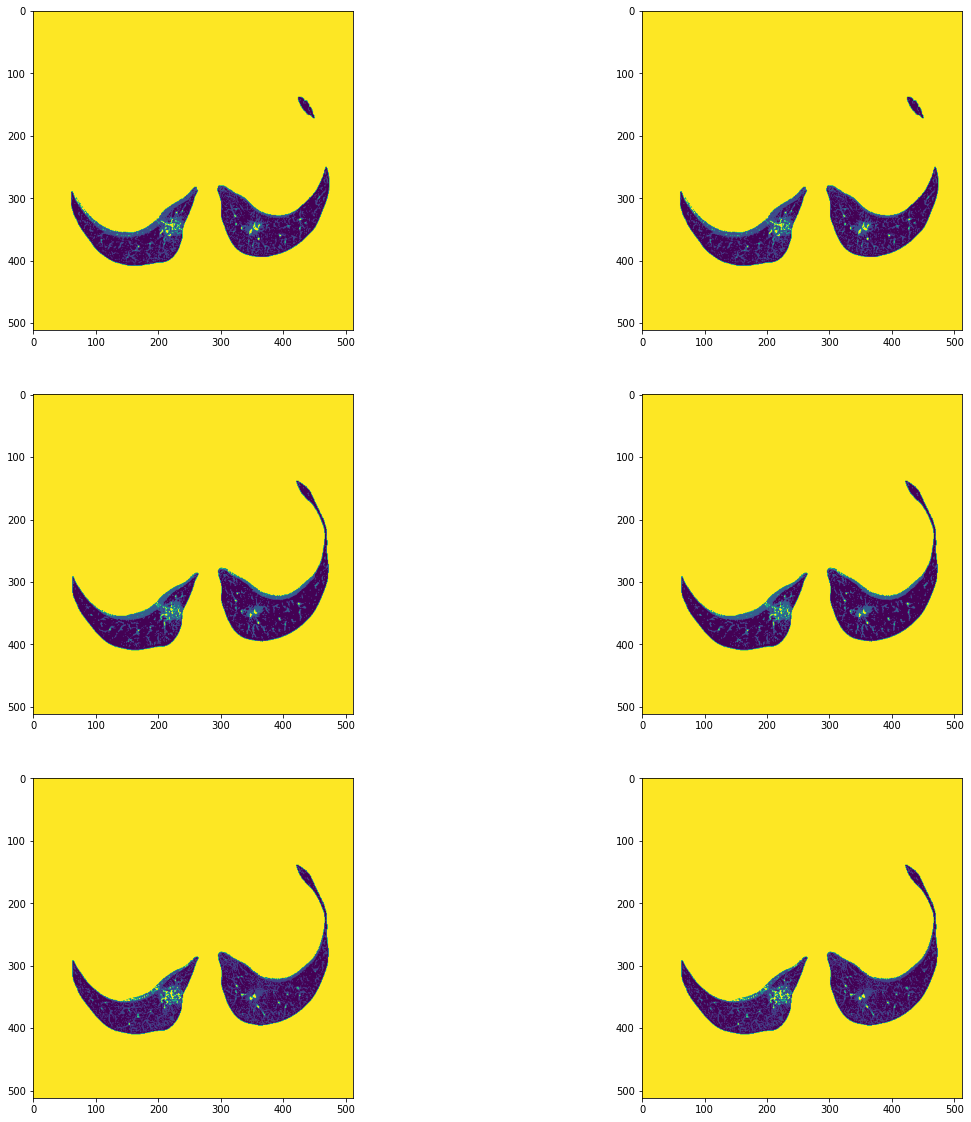

In [ ]:
fig, ((ax1), (ax2), (ax3)) = plt.subplots(3, 2,figsize=(20, 20))
ax1[0].imshow((ctscansarray[900]))#,cmap="gray")
ax1[1].imshow((KmeanSegData[900]))#,cmap="gray")
ax2[0].imshow((ctscansarray[901]))#,cmap="gray")
ax2[1].imshow((KmeanSegData[901]))#,cmap="gray")
ax3[0].imshow((ctscansarray[902]))#,cmap="gray")
ax3[1].imshow((KmeanSegData[902]))#,cmap="gray")

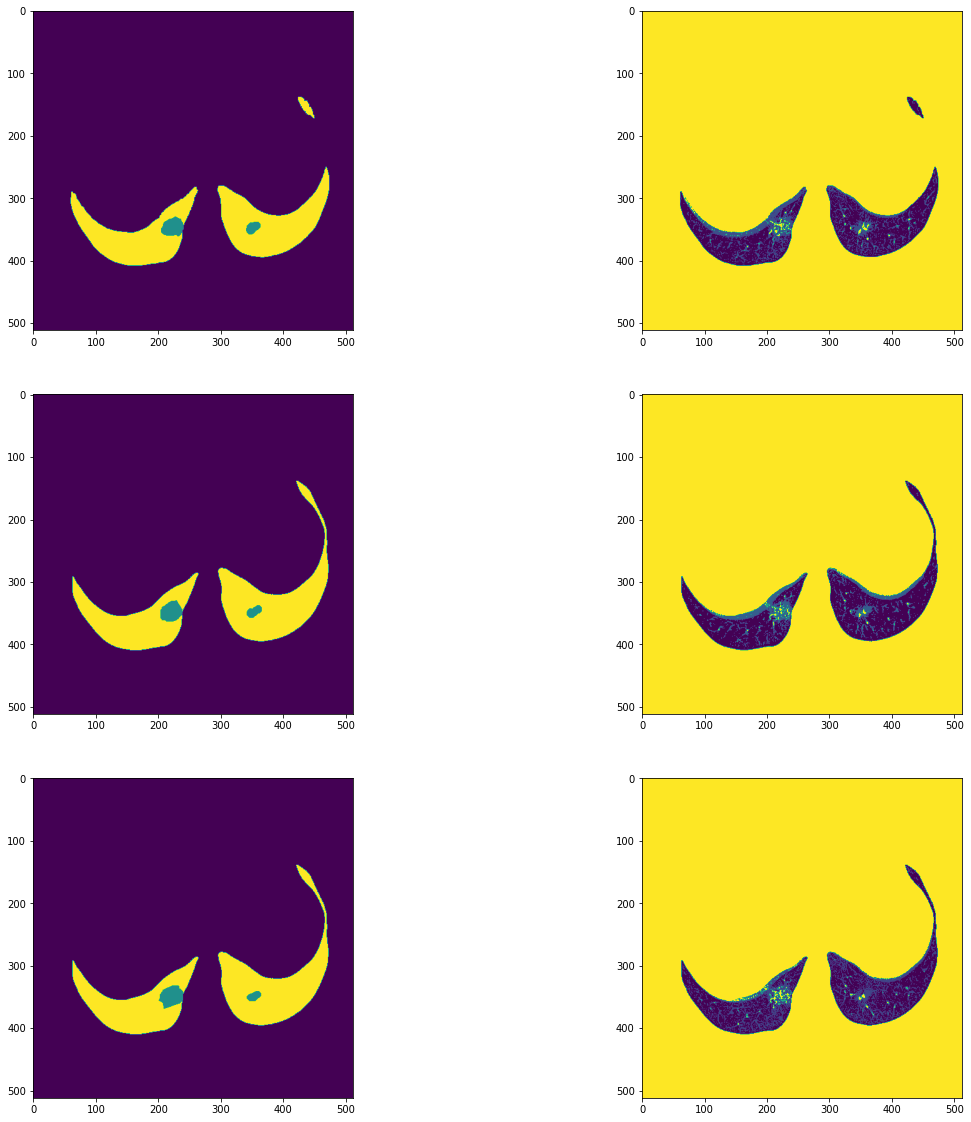

In [ ]:
fig, ((ax1), (ax2), (ax3)) = plt.subplots(3, 2,figsize=(20, 20))
ax1[0].imshow((ctmasksarray[900]))#,cmap="gray")
ax1[1].imshow((KmeanSegData[900]))#,cmap="gray")
ax2[0].imshow((ctmasksarray[901]))#,cmap="gray")
ax2[1].imshow((KmeanSegData[901]))#,cmap="gray")
ax3[0].imshow((ctmasksarray[902]))#,cmap="gray")
ax3[1].imshow((KmeanSegData[902]))#,cmap="gray")

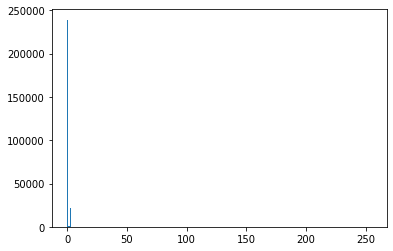

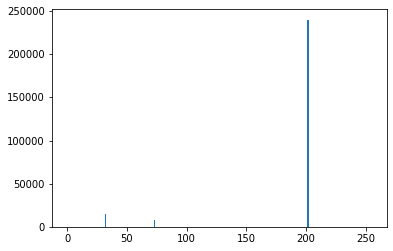

In [ ]:
#Historgram Test
img1 = ctmasksarray[900]
img2 = KmeanSegData[900]
#plt.hist(img.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k') #calculating histogram
plt.hist(img1.ravel(),256,[0,255])
plt.show()
plt.hist(img2.ravel(),256,[0,255])
plt.show()

In [ ]:
ctmaskinfected = []
Kmeansinfected = []
ctmaskhealthy = []
Kmeanshealthy = []
for i in range(len(KmeanSegData)):
  ctmaskinfected.append(np.sum((ctmasksarray[i])==1))
  Kmeansinfected.append(np.sum((KmeanSegData[i])==1))
  ctmaskhealthy.append(np.sum((ctmasksarray[i])==2))
  Kmeanshealthy.append(np.sum((KmeanSegData[i])==73))

In [ ]:
tp = 0
tn = 0
fn = 0
fp = 0

for i in range(len(KmeanSegData)):
	if((ctmaskinfected[i] == Kmeansinfected[i])):
 			tp = tp + 1
	if((ctmaskhealthy[i] == Kmeanshealthy[i])):
			tn = tn + 1
	if((ctmaskhealthy[i] == Kmeansinfected[i])):
			fn = fn + 1
	if((ctmaskinfected[i] == Kmeanshealthy[i])):
			fp = fp + 1

print ('\n************Calculation of Tpr, Fpr, F-Score')
print(tp)
print(tn)
print(fn)
print(fp)
#TP rate = TP/TP+FN
tpr= float(tp)/(tp+fn)
print("\nTPR is:",tpr)

#fp rate is
fpr= float(fp)/(fp+tn)
print("\nFPR is:",fpr)

#F-score as 2TP/(2TP + FP + FN)
fscore = float(2*tp)/((2*tp)+fp+fn)
print("\nFscore:",fscore)


************Calculation of Tpr, Fpr, F-Score
423
0
0
423

TPR is: 1.0

FPR is: 1.0

Fscore: 0.6666666666666666
